정규화 - 행 단위로 스케일링

In [33]:
import numpy as np
from sklearn import preprocessing
from sklearn import compose

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#특성 행렬 생성
features = np.array([[1,2], [2,3], [3,8], [4,2], [7,2]])
features

#AI에서 컬럼을 Feature라고 불림


#변환기 객체 생성 - 두개의 숫자 합으로 나눔
normalizer = Normalizer(norm="l1")
print(normalizer.transform(features))
print()

#변환기 객체 생성 - 두개 중 큰 겂으로 나눔
normalizer = Normalizer(norm="max")
print(normalizer.transform(features))

#이렇게 정규화를해서 거리를 계산해서 유사도 판단할 때 사용
#자연어 처리에서 많이 사용

[[0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.27272727 0.72727273]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]]

[[0.5        1.        ]
 [0.66666667 1.        ]
 [0.375      1.        ]
 [1.         0.5       ]
 [1.         0.28571429]]


import numpy as np
from sklearn.preprocessing import PolynomialFeatures교차항과 다항특성

In [23]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

features = np.array([[1,2], [2,3], [3,8], [4,2], [7,2]])

#교차항과 다항특성을 만들어줄 객체 생성
polynomial_interaction = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

polynomial_interaction.fit_transform(features)

array([[ 1.,  2.,  1.,  2.,  4.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 3.,  8.,  9., 24., 64.],
       [ 4.,  2., 16.,  8.,  4.],
       [ 7.,  2., 49., 14.,  4.]])

특성 변환 - 기존 컬럼을 가지고 연산을 수행해서 새로운 컬럼을 만드는 것

In [11]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [24]:
#파이썬 기본문법 이용
data = [100, 200, 300]

#전부 100을 더해주는 작업
result = []
for i in data:
    result.append(i + 100)
print(result)

#함수형 프로그래밍의 map 함수 이용
def add_hund(x):
    return x+100
result = map(add_hund, data)
print(result)
for i in result:
    print(i, end='\t')
print()

#함수의 내용이 한줄이라서 lambda 이용
result = map(lambda x: x+100, data)
for i in result:
    print(i, end='\t')
print()

[200, 300, 400]
200	300	400	
200	300	400	


In [37]:
#pandas의 apply 함수 이용한 함수 매핑
titanic = sns.load_dataset('titanic')
print(titanic['age'].apply(add_hund))

#sklearn의 FunctionTransformer 이용
one_transformer = preprocessing.FunctionTransformer(add_hund)
print(one_transformer.transform(titanic['age']))

#2개의 컬럼에 다른함수를 적용 - ColumnTransformer
#age열에는 add_hund라는 함수를 적용하고 
#parch열에는 lambda 함수를 적용
from sklearn import compose
column_transformer = compose.ColumnTransformer(
    [('add_hund', preprocessing.FunctionTransformer(add_hund),['age']),
    ('two-hund', preprocessing.FunctionTransformer(lambda x : x + 1), ['parch'])])
column_transformer.fit_transform(titanic)

0      122.0
1      138.0
2      126.0
3      135.0
4      135.0
       ...  
886    127.0
887    119.0
888      NaN
889    126.0
890    132.0
Name: age, Length: 891, dtype: float64
0      122.0
1      138.0
2      126.0
3      135.0
4      135.0
       ...  
886    127.0
887    119.0
888      NaN
889    126.0
890    132.0
Name: age, Length: 891, dtype: float64


array([[122.,   1.],
       [138.,   1.],
       [126.,   1.],
       ...,
       [ nan,   3.],
       [126.,   1.],
       [132.,   1.]])

###이산화 - 구간 분할

In [46]:
# 데이터 읽어오기
mpg = pd.read_csv('c://programming/python/pandasdata/auto-mpg.csv', header=None)

# 열 이름을 설정
mpg.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
              'model year','origin','name']

#horsepower를 숫자 자료형으로 변경
mpg['horsepower'] = mpg['horsepower'].replace('?', '0') # ?을 0으로 숫자변환
mpg['horsepower'] = mpg['horsepower'].astype('float') # 문자열을 실수형으로 변환

#3개로 분할하기 위한 경계값 만들기
count, bin_dividers = np.histogram(mpg['horsepower'], bins=3)
print(bin_dividers)
print()

#각 분할에 할당값을 생성
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
mpg['hp_bin'] = pd.cut(x=mpg['horsepower'], # 데이터 배열
bins=bin_dividers, # 경계 값 리스트
labels=bin_names, # bin 이름
include_lowest=True) # 첫 경계값 포함

# horsepower 열, hp_bin 열의 첫 10행을 출력
print(mpg[['horsepower', 'hp_bin']].head(10))


[  0.          76.66666667 153.33333333 230.        ]

   horsepower hp_bin
0       130.0   보통출력
1       165.0    고출력
2       150.0   보통출력
3       150.0   보통출력
4       140.0   보통출력
5       198.0    고출력
6       220.0    고출력
7       215.0    고출력
8       225.0    고출력
9       190.0    고출력


In [ ]:
수치 데이터의 이산화

In [48]:
# 특성을 만듭니다.
age = np.array([[13],[30],[67],[36],[64],[24]])
# 30을 기준으로 분할
result = np.digitize(age, bins=[30])
print(result)
print()

#0-19, 20-29, 30-63, 64이상의 구간으로 분할
result = np.digitize(age, bins=[20,30,64])
print(result)
print()

#0-20, 21-30, 31-64, 64초과 구간으로 분할
result = np.digitize(age, bins=[20,30,64], right=True)
print(result)
print()

[[0]
 [1]
 [1]
 [1]
 [1]
 [0]]

[[0]
 [2]
 [3]
 [2]
 [3]
 [1]]

[[0]
 [1]
 [3]
 [2]
 [2]
 [1]]



In [50]:
from sklearn.preprocessing import Binarizer
print(age)

#scikit-learn을 이용해서 구간 분할

#2개의 구간으로 분할
# Binarizer 객체생성
binarizer = preprocessing.Binarizer(threshold=30.0)

# 특성을 변환합니다.
print(binarizer.transform(age))

[[13]
 [30]
 [67]
 [36]
 [64]
 [24]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [53]:
age = np.array([[13],[21], [22], [31], [45], [28], [29], [44]])

#이전의 numpy의 digitize와 유사한 결과
kb = preprocessing.KBinsDiscretizer(4, encode='ordinal', strategy='quantile')
print(kb.fit_transform(age))
print()
#희소행렬로 리턴
kb = preprocessing.KBinsDiscretizer(4, encode='onehot', strategy='quantile')
print(kb.fit_transform(age))
print()
#밀집 행렬로 리턴 - 구간의 개수만큼 컬럼을 생성
kb = preprocessing.KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')
print(kb.fit_transform(age))
print()
#밀집 행렬로 리턴 
kb = preprocessing.KBinsDiscretizer(4, encode='onehot-dense', strategy='uniform')
print(kb.fit_transform(age))
print()

[[0.]
 [0.]
 [1.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]]

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 3)	1.0

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]



   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         36         24
4         64         37
5         24         46
   feature_1  feature_2  group
0         13         30      2
1         30         40      2
2         67         44      1
3         36         24      0
4         64         37      1
5         24         46      2


<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

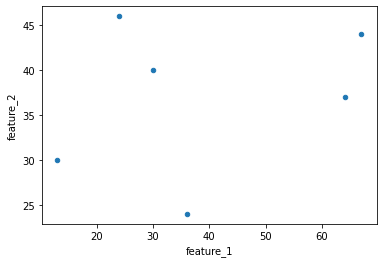

In [57]:
#군집 분석을 이용한 이산화
from sklearn.cluster import KMeans

#데이터 생성
sample = np.array([[13, 30], [30, 40], [67, 44], [36, 24], [64, 37], [24, 46]])
df = pd.DataFrame(sample, columns=['feature_1', 'feature_2'])
print(df)


#필요한 군집의 개수를 가지고 객체를 생성
cluster = KMeans(3, random_state = 42)
#모델을 생성
cluster.fit(sample)
#예측
df['group'] = cluster.predict(sample)
print(df)

df.plot(kind='scatter', x='feature_1', y='feature_2')